<a href="https://colab.research.google.com/github/hyemworks/make-your-firstGAN-with-pytorch/blob/main/ch08_face_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 08 &nbsp;&nbsp;&nbsp;&nbsp;Face Image**


이번 장에서는 GAN을 훈련해 사람의 얼굴을 생성해보자.<br>
이전의 단색 이미지를 생성하는 것보다 어려운 도전 두가지에 직면한다.

* 풀컬러 이미지를 **훈련**해야하고, 풀컬러 이미지를 **생성**해야 한다.
* 사진의 훈련 데이터셋을 이용해 좀 더 다양하고 그럴듯한 결과를 얻어야 한다.

## 컬러 이미지

대부분의 파이썬 라이브러리가 컬러 이미지를 표현하는 데 아래의 형식을 사용함!

![3차원 넘파이배열 또는 텐서.png](https://buomsoo-kim.github.io/data/images/2018-04-28/1.png)

## CelebA 데이터셋

: 총 202,599개의 유명인 얼굴이미지가 존재하는 데이터셋<br>
: [CelebA Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)<br>
: JPEG 파일형태로 저장

↪ GAN 훈련을 할 때 충분한 양의 이미지를 확보 (단, 비상업적인 연구나 교육용도로 사용)

## 계층적 데이터 형식

> 문제
- CelebA 데이터셋의 수천개의 이미지
- GAN 코드가 훈련과정에서 알아서 이미지를 여닫게 하는 것은 효율적인 방법이 아님
- 구글 드라이브 마운트를 사용할 경우, 더 많은 시간 소요

⬇ ⬇ ⬇

> 해결방안
- 데이터를 **특정 형식**으로 변형
- **파일 접근을 용이**하게 하고, **반복**에도 강하게 할 수 있음!<br>
➡ 이 책에서는 **HDF5**라는 포맷을 사용해 이미지를 처리!



##### ✅ **HDF**<br>
: **Hierarchical Data Format**<br>
: **계층적 데이터 형식**<br>

: 특징 (폴더 구조와 비슷)
* 하나 이상의 그룹을 가질 수 있음
* 그룹 안에 여러 개의 데이터셋이 포함될 수 있음
* 그룹 안에 그룹이 존재하는 것이 가능함
![hdf5_structure.jpg](http://jehoons.github.io/assets/images/hdf5_structure4.jpg)

: 용량이 매우 큰 데이터에 효과적으로 접근하기 위해 만들어진 성숙한 데이터 형식<br>
: 과학이나 공학 응용 분야에서 널리 쓰임

+
> HDF5 포맷과 이를 이용한 많은 라이브러리는 좀 더 나은 성능을 위한 많은 기능을 장착하고 있음.<br>
<br>
ex)
* 느린속도의 개선을 위해, 데이터를 압축해서 전송하는 방법 이용
* 데이터를 자동으로 메모리에 매핑하여 조금 더 성능을 높이는 방법을 사용

<br>

↪ 이러한 기능없이, 몇천 장의 이미지를 직접 다루 는 것은 실용적이지 않음<br>
&nbsp;&nbsp;&nbsp;&nbsp;구글 드라이브를 쓰지 않고 로컬 저장소를 사용해 작업한다고 해도,<br>
&nbsp;&nbsp;&nbsp;&nbsp;HDF5 형식을 이용하는 것이 **머신러닝 작업을 조금이나마 개선할 수 있는지 확인**해보는 게 좋음


## 데이터 가져오기

celeba_dataset라는 이름의 새 폴더를 mnist_data와 같은 레벨에 생성해두자.
* **CelebA 데이터셋**을 다운로드하고 
* **20,000개**의 이미지를 추출하여
* **HDF5 파일**로 묶는

코드는 해당 [github](https://github.com/makeyourownneuralnetwork/gan/blob/master/10_celeba_download_make_hdf5.ipynb)에 소개되어 있다.


↪ 그런데, 번역시점에서 코드 실행 시 오류가 발생함. 이에, 다른 코드를 사용.<br>
&nbsp;&nbsp;&nbsp;&nbsp; [한빛미디어 사이트](https://www.hanbit.co.kr/src/10395)에서 img_align_celeba_20000.zip 파일을 다운로드받아 사용.<br>
&nbsp;&nbsp;&nbsp;&nbsp; 구글 드라이브의 실습폴더 내부에 celeba라는 폴더를 만들어 그 안에 업로드!

수정된 코드는 아래와 같음.




In [1]:
# mount Drive to access data files

from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
'''
import torchvision.datasets

# download data
mnist_dataset = torchvision.datasets.CelebA(root='.', download=True)
'''

In [8]:
import h5py
import zipfile
import imageio
import os

In [10]:
%%time

# set location of the HDF5 package
hdf5_file = 'mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/celeba_dataset/celeba_aligned_small.h5py'

# how many of the 202,599 images to extract and package into HDF5
total_images = 20000 # actually, unuseful for this code

with h5py.File(hdf5_file, 'w') as hf:

    count = 0

    with zipfile.ZipFile('mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/celeba/img_align_celeba_20000.zip', 'r') as zf:
      for i in zf.namelist():
        if (i[-4:] == '.jpg'): # from i[-4] to i[-1]
          
          # extract image
          ofile = zf.extract(i)
          img = imageio.imread(ofile)
          os.remove(ofile)

          # add image data to HDF5 file with new name
          hf.create_dataset('img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
          
          count = count + 1

          if (count%1000 == 0):
            print("images done .. ", count)
            
          # stop when total_images reached
          if (count == total_images):
            break


images done ..  1000
images done ..  2000
images done ..  3000
images done ..  4000
images done ..  5000
images done ..  6000
images done ..  7000
images done ..  8000
images done ..  9000
images done ..  10000
images done ..  11000
images done ..  12000
images done ..  13000
images done ..  14000
images done ..  15000
images done ..  16000
images done ..  17000
images done ..  18000
images done ..  19000
images done ..  20000
CPU times: user 3min 1s, sys: 22.4 s, total: 3min 23s
Wall time: 4min 22s


## 데이터 살펴보기

책에서는 새로운 노트북을 만들라고 안내하지만, 이대로 진행하겠음

In [11]:
import h5py # For data access

import numpy
import matplotlib.pyplot as plt

##### ✅ **H5PY**<br>
: HDF5 패키지를 굉장히 "파이써닉"하게 이용할 수 있게 해주는 라이브러리.<br>
: 그룹이나 데이터셋을 **파이썬 딕셔너리 객체**처럼 사용하면 됨!

➡ 다음 코드를 통해 자세히 이해해보자


In [12]:
# Open HDF5 file and list any groups

with h5py.File('mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/celeba_dataset/celeba_aligned_small.h5py', 'r') as file_object:

  for group in file_object:
    print(group)

img_align_celeba


출력 결과, img_align_celeba라는 그룹 하나밖에 보이지 않는다.

<br>

➡ 이제 **파이썬에서 딕셔너리에 접근할 때와 동일하게** 이미지를 담은 데이터셋의 접근 및 활용이 가능하다!
* ❗`dataset = file_object['img_align_celeba']`❗로 내부 데이터에 접근할 수 있다.
* ❗`dataset['7.jpg']`❗와 같이 개별적인 이미지에도 접근이 가능하다.
* 이미지 데이터 자체는 **HDF5 형식**으로 저장되어 있지만, **넘파이 행렬**로 쉽게 바꿀 수 있다.<br>
넘파이 행렬을 matplotlib의 imshow()로 그려볼 수도 있겠다.

아래 코드를 통해 확인하자!


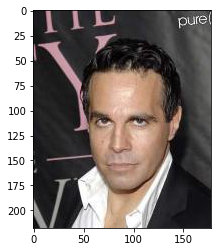

In [13]:
with h5py.File('mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/celeba_dataset/celeba_aligned_small.h5py', 'r') as file_object:

  dataset = file_object['img_align_celeba']
  image = numpy.array(dataset['7.jpg'])
  plt.imshow(image, interpolation = 'none')
  

In [15]:
# the shape of the image array

image.shape   # height  : 218
              # width   : 178
              # channel : 3

(218, 178, 3)

## 데이터셋 클래스

앞서 MNIST 데이터셋을 위해 만들었던 클래스를 수정했음.

In [2]:
# import libraries

import torch
import torch.nn as nn
from torch.utils.data import Dataset

import h5py
import pandas, numpy, random
import matplotlib.pyplot as plt

In [3]:
# CELEBA DATASET CLASS

class CelebADataset(Dataset):

  # Constructor
  def __init__(self, file):
    self.file_object = h5py.File(file, 'r')
    self.dataset = self.file_object['img_align_celeba']

  def __len__(self):
    # 데이터 프레임의 길이 반환
    return len(self.dataset)


  # 특정 아이템을 인덱스를 통해 접근가능한 함수
  def __getitem__(self,index):
    if (index >= len(self.dataset)):
      raise IndexError()
    
    img = numpy.array(self.dataset[str(index)+'.jpg'])

    return torch.cuda.FloatTensor(img) / 255.0


  # 데이터셋 내의 특정 이미지를 골라 차트를 그려보는 메서드
  def plot_image(self, index):
    plt.imshow(numpy.array(self.dataset[str(index)+'.jpg']), interpolation='nearest')   # 나타내기

CelebA 데이터셋을 생성했으니, 객체를 만들어서 데이터의 형태를 확인해보자

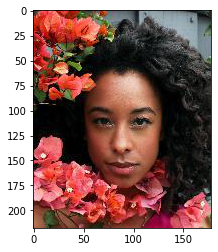

In [4]:
# Create dataset object
celeba_dataset = CelebADataset('mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/celeba_dataset/celeba_aligned_small.h5py')

# Check data contains images
celeba_dataset.plot_image(43)



---



---



---



## 판별기

판별기는 이미지가 가짜인지 진짜인지 분류하는 역할을 한다.

CelebA 데이터셋은 **218 x 178 x 3** 의 형태를 갖는 이미지이며, 이들은 모두 중요한 정보이므로 전부 판별기에 투입해야 한다!<br>

➡ 즉, 판별기가 **218 x 178 x 3 = 116,412개**의 노드로 **입력**을 받아야 한다는 것을 뜻함!

#### **🦋 116,412개의 값을 어떻게 정렬해서 판별기에 투입해야할까?**

- MNIST 분류기와 판별기에서는 그저 데이터셋에 들어 있는 순서 그대로 값을 투입했음.
  - 그 값들은 이미지 행을 따라서 연속으로 들어있는 각 픽셀 값이었으므로, 행의 끝에 이르면 다음 행으로 자연스레 이어짐
  - **완전 연결 신경망**이기 때문에, 다시말해서 결국 한 레이어의 모든 노드는 다음 레이어의 모든 노드와 연결되어 있기 때문에, **일관된 기준**만 있으면 정렬은 크게 중요하지 않음.
  - 즉, 픽셀 값을 입력 텐서의 어느 곳에 위치시켜도 특별히 더 나을 게 없음.


➡ 풀컬러 이미지에 대해서도 비슷한 과정을 진행할 수 있음.
- 픽셀을 나열하거나 형태를 바꿔서 **218 x 178 x 3** 텐서 이미지를 **116,412**의 **1차원 텐서**로 바꾸고 이를 완전 연결 신경망에 투입하면 된다!
  - 사실, 이미지를 **어떻게 풀어서 일렬로 만들지는 크게 중요하지 않음**
  - 한가지 기준을 정하고, 판별기에 투입할 때마다 **같은 방식을 유지**하기만 하면 됨!



   .

### **Standard CUDA Check And Set Up**

In [24]:
# check if CUDA is available
# if yes, set default tensor type to cuda

if torch.cuda.is_available():
  torch.set_default_tensor_type(torch.cuda.FloatTensor)
  print("using cuda:", torch.cuda.get_device_name(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

using cuda: Tesla K80


device(type='cuda')

### **Helper Function**

In [31]:
# functions to generate random data

def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

In [32]:
# modified from https://github.com/pytorch/vision/issues/720


class View(nn.Module):
    def __init__(self, shape):
        super(View, self).__init__()
        self.shape = shape,  # extra comma

    def forward(self, x):
        return x.view(*self.shape)


### **Discriminator**

In [33]:
class Discriminator(nn.Module):
  
  # Constructor
  def __init__(self):

    # 파이토치 부모 클래스 초기화
    super().__init__()

    # 신경망 레이어 정의 - 통과시킬 레이어를 순서대로 기술
    self.model = nn.Sequential(
        View(3*218*178),            # View   : 3차원 이미지 텐서 (218,178,3)을 1차원 형태의 텐서 (218*178*3,)로 바꿔주는 역할 수행 

        nn.Linear(3*218*178, 100),  # Linear : 완전연결 매핑을 의미 => 여기에서는 훈련 시 노드를 업데이트할 가중치에 대한 정보도 포함되어 있음
        nn.LeakyReLU(),

        nn.LayerNorm(100),

        nn.Linear(100, 1),
        nn.Sigmoid()
    )

    # Loss Function 설정
    self.loss_function = nn.BCELoss()

    # Optimizer 설정
    self.optimizer = torch.optim.Adam(self.parameters(), lr=0.001)

    # 훈련 시각화 (train 함수에서 사용될 변수 초기화)
    self.counter = 0
    self.progress = []


  # forward function : 네트워크에 정보 전달
  def forward(self, inputs):
    # 모델 실행
    return self.model(inputs)


  # train
  def train(self, inputs, targets):
    # inputs  : 신경망에 전달할 입력  
    # targets : 원하는 목표 --> 이를 통해 손실을 계산

    ### 신경망 출력 계산
    outputs = self.forward(inputs)  # train 함수에서 가장 먼저 해야할 일! == forward()로 입력값을 신경망에 전달하여 결과를 얻어내는 것
    
    ### 손실 계산
    loss = self.loss_function(outputs, targets)
    #  계산 그래프의 마지막 노드는 손실함수!
    #   => 손실 계산을 위해 각 노드에서 기울기가 변하는 것은 각 학습 파라미터가 변할 때마다 손실이 변하는 것과 같음
    

    ### 훈련 시각화 (모니터링)
    # 카운터를 증가시키고 10회마다 오차 저장
    self.counter += 1;
    if (self.counter % 10 == 0):
        self.progress.append(loss.item()) # item() : 텐서에서 값을 꺼내오는 함수
    if (self.counter % 10000 == 0):
        print("counter = ", self.counter)


    ### 손실을 사용해 네트워크의 가중치를 업데이트
    # 기울기 초기화
    self.optimizer.zero_grad()  # 계산 그래프의 기울기가 모두 0으로 초기화
                                #   : 신경망을 훈련할 때마다 매번 기울기는 0으로 설정되어 있어야 함
                                #      => 그렇게 하지 않으면 loss.backward()를 따라 계산마다 쌓이게 됨
    # 역전파 실행
    loss.backward()
    # 가중치 갱신
    self.optimizer.step()



  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
    

## 판별기 테스트하기

판별기 테스트를 통해, 모델이 적어도 임의의 픽셀값과 실제 이미지를 구별할 수 있는지 확인해보자

In [35]:
%%time

# test discriminator can separate real data from random noise

D = Discriminator()

# move model to cuda device
D.to(device)

for image_data_tensor in celeba_dataset:
  # real data
  D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
  # fake data
  D. train(generate_random_image((218,178,3)), torch.cuda.FloatTensor([0.0]))


counter =  10000
counter =  20000
counter =  30000
counter =  40000
CPU times: user 5min 36s, sys: 5.54 s, total: 5min 41s
Wall time: 5min 44s


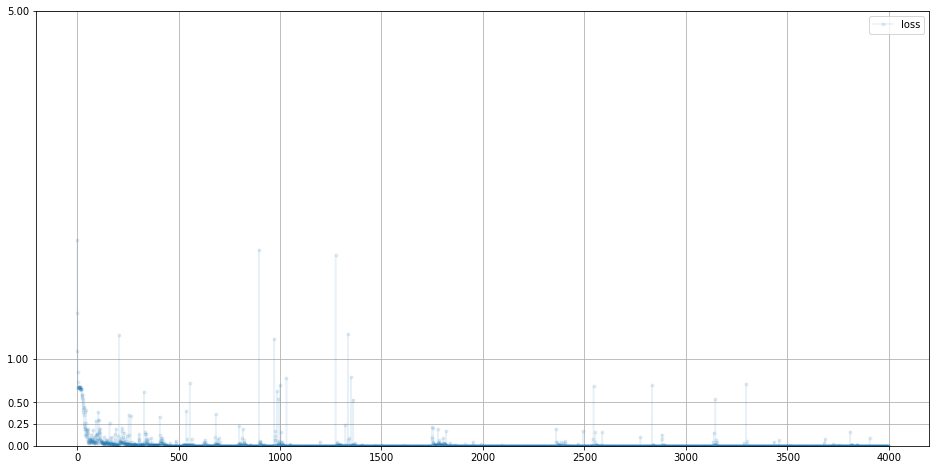

In [36]:
# plot discriminator loss

D.plot_progress()

## GPU 가속


#### | Standard CUDA Check And Setup |
```
# check if CUDA is available
# if yes, set default tensor type to cuda

if torch.cuda.is_available():
  torch.set_default_tensor_type(torch.cuda.FloatTensor)
  print("using cuda:", torch.cuda.get_device_name(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device
```
상단 코드에서 이미 GPU로 텐서를 옮겨서 계산하였고, **약 5분 44초**가 소요되었다.<br>
CPU를 사용하는 경우 **약 1시간 20분** 정도 소요된다.


## 생성기

In [38]:
class Generator(nn.Module):


  def __init__(self):
    
    # 파이토치 부모클래스 초기화
    super().__init__()

    # 신경망 레이어 정의
    self.model = nn.Sequential(
        nn.Linear(100, 3*10*10),
        nn.LeakyReLU(),

        nn.LayerNorm(3*10*10),
        
        nn.Linear(3*10*10, 3*218*178),
        nn.Sigmoid(),

        View((218,178,3))       # View   : 1차원 형태의 텐서 (218*178*3,)를 3차원 이미지 텐서 (218,178,3)로 바꿔주는 역할 수행 

    )

    # 옵티마이저 설정
    self.optimizer = torch.optim.Adam(self.parameters(), lr=0.01)

    # 진행측정을 위한 변수 초기화
    self.counter = 0
    self.progress = []



  def forward(self, inputs):
    # 모델 실행
    return self.model(inputs)


  def train(self, D, inputs, targets):

    # 신경망 출력 계산
    g_output = self.forward(inputs)

    # 판별기로 전달
    d_output = D.forward(g_output)

    # 오차계산
    loss = D.loss_function(d_output, targets)


    # 카운터를 증가시키고 10회마다 오차 저장
    self.counter += 1
    if (self.counter %10 == 0):
      self.progress.append(loss.item())
    
    # 기울기를 초기화하고 역전파 후 가중치 갱신
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()



  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    
    # BCELoss()를 사용했기 때문에 값들이 0-1사이에 항상 머물러있진 않음. => 손실범위의 상한선을 없애고 수평격자선을 추가!
    # df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))


## 생성기 결과 확인하기

CPU times: user 27 ms, sys: 980 µs, total: 27.9 ms
Wall time: 36.6 ms


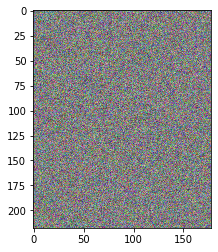

In [39]:
%%time

# test generator can create fake data

G = Generator()

# move model to cuda device
G.to(device)

output = G.forward(generate_random_seed(100))
img = output.detach().cpu().numpy()
plt.imshow(img, interpolation='none', cmap='Blues')


## GAN 훈련하기

In [41]:
%%time 

# Create discriminator and generator
D = Discriminator()
G = Generator()

# Move model to cuda device
D.to(device)
G.to(device)

epochs = 1

for epoch in range(epochs):
  print("epoch = ", epoch + 1)

  # Train Discriminator and Generator

  for image_data_tensor in celeba_dataset:
    
    # 01. Train dicriminator on "real data"
    D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
    
    # 02. Train discriminator on "fake data"
    # Use detach() so gradients in G are not calculated
    D.train(G.forward(generate_random_seed(100)).detach(), torch.cuda.FloatTensor([0.0]))
    
    # 03. Train generator
    G.train(D, generate_random_seed(100), torch.cuda.FloatTensor([1.0]))


epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
CPU times: user 15min 5s, sys: 7.56 s, total: 15min 13s
Wall time: 15min 15s


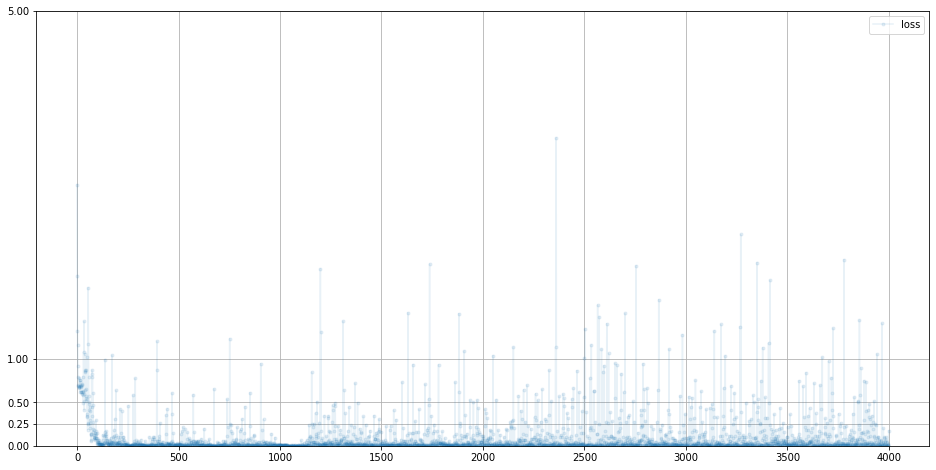

In [42]:
# plot discriminator loss

D.plot_progress()

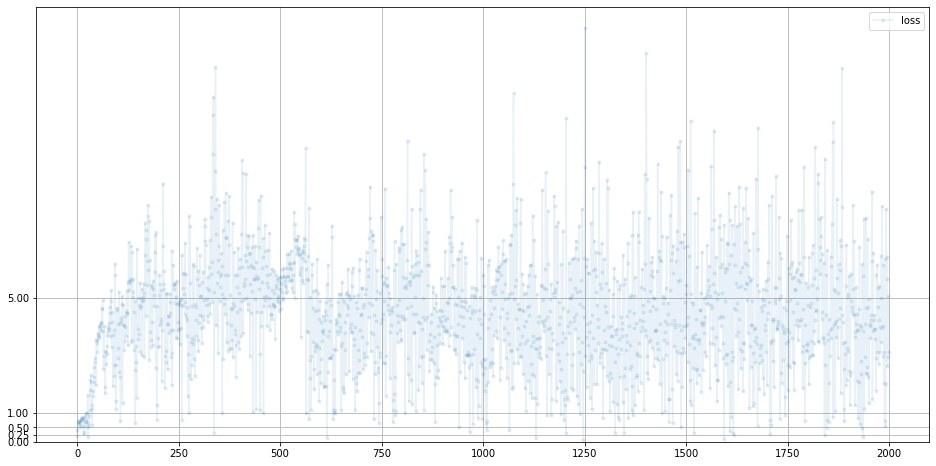

In [43]:
# plot generator loss

G.plot_progress()

손실함수로 BCELoss를 사용하고 있기 때문에, 이상적인 손실값은 ${ln(2) \approx 0.69}$이다.

> 책에서는 1 에폭만 돌려도 이상적인 결과가 나오는 것 같은데, 본인은 그렇지 않음...

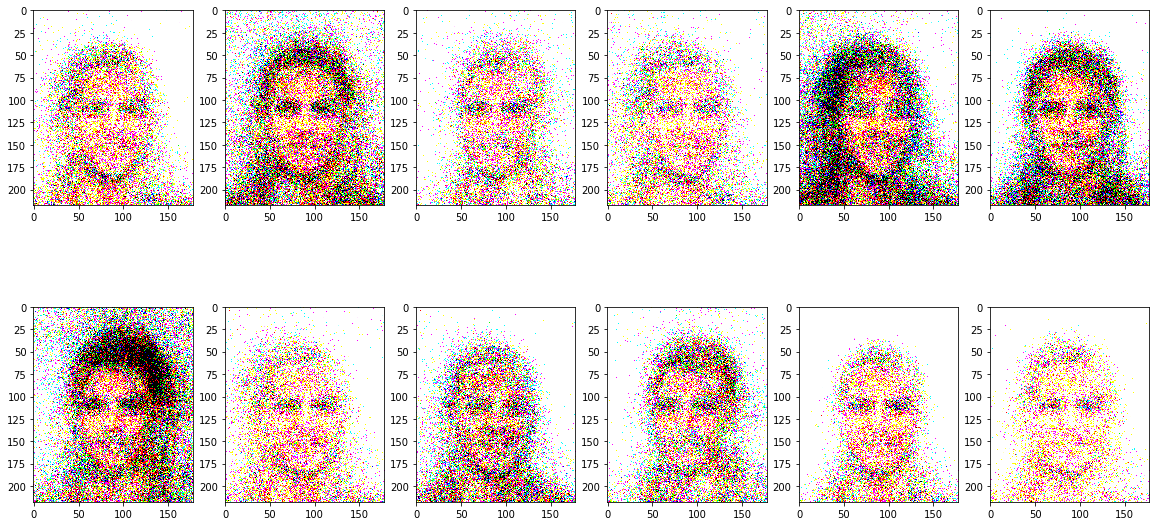

In [50]:
# plot several outputs from the trained generator
# plot a 6 column, 2 row array of generated images

f, axarr = plt.subplots(2,6, figsize=(20,10))
for i in range(2):
  for j in range(6):
    output = G.forward(generate_random_seed(100))
    img = output.cpu().detach().numpy()
    axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

6에폭으로 돌려보자

In [51]:
%%time 

# Create discriminator and generator
D = Discriminator()
G = Generator()

# Move model to cuda device
D.to(device)
G.to(device)

epochs = 6

for epoch in range(epochs):
  print("epoch = ", epoch + 1)

  # Train Discriminator and Generator

  for image_data_tensor in celeba_dataset:
    
    # 01. Train dicriminator on "real data"
    D.train(image_data_tensor, torch.cuda.FloatTensor([1.0]))
    
    # 02. Train discriminator on "fake data"
    # Use detach() so gradients in G are not calculated
    D.train(G.forward(generate_random_seed(100)).detach(), torch.cuda.FloatTensor([0.0]))
    
    # 03. Train generator
    G.train(D, generate_random_seed(100), torch.cuda.FloatTensor([1.0]))

epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
epoch =  2
counter =  50000
counter =  60000
counter =  70000
counter =  80000
epoch =  3
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch =  4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
epoch =  5
counter =  170000
counter =  180000
counter =  190000
counter =  200000
epoch =  6
counter =  210000
counter =  220000
counter =  230000
counter =  240000
CPU times: user 1h 31min 6s, sys: 46.4 s, total: 1h 31min 52s
Wall time: 1h 31min 34s


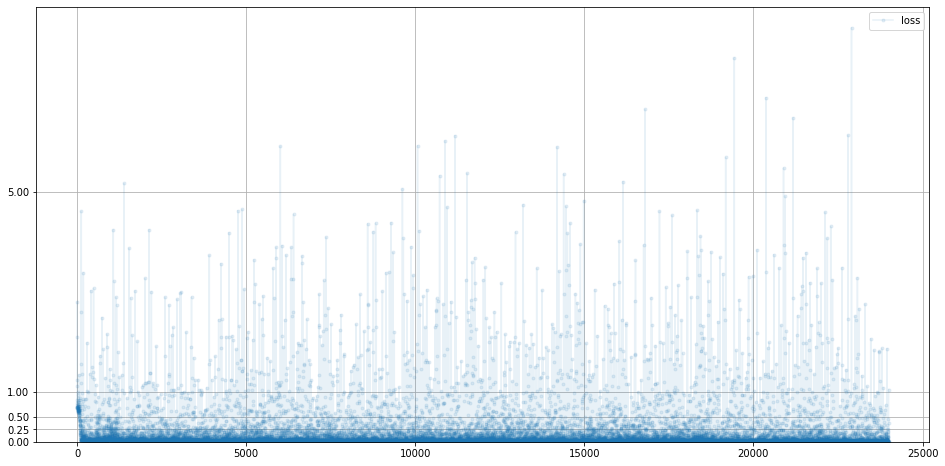

In [52]:
# plot discriminator loss

D.plot_progress()

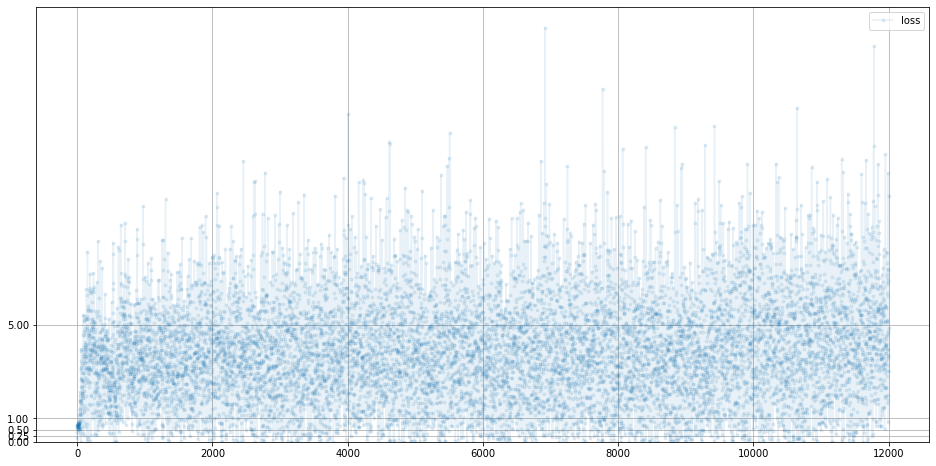

In [53]:
# plot generator loss

G.plot_progress()

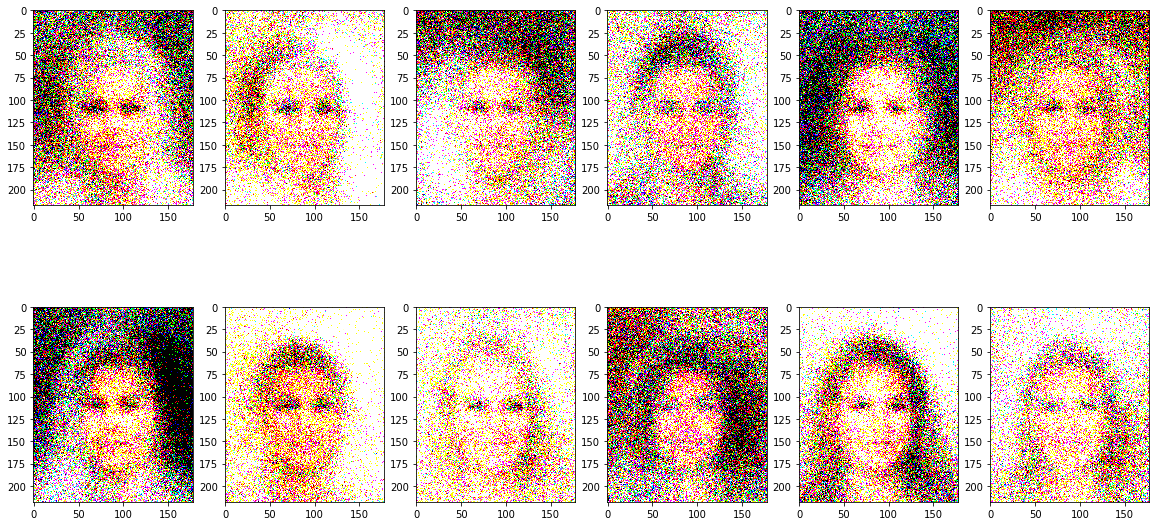

In [54]:
# plot several outputs from the trained generator
# plot a 6 column, 2 row array of generated images

f, axarr = plt.subplots(2,6, figsize=(20,10))
for i in range(2):
  for j in range(6):
    output = G.forward(generate_random_seed(100))
    img = output.cpu().detach().numpy()
    axarr[i,j].imshow(img, interpolation='none', cmap='Blues')

<br>

#### 🦋 **생성기가 배운 것은 이미지를 생성할 때 훈련데이터의 우도(가능도)$^{likelihood}$이다!**

<br>


**[APPENDIX B]**


#### ✅ **우도**

= **가능도, likelihood**





---

## **Summary**
> * 색상은 대부분의 경우에 R, G, B로 모델링된다.<br>
풀컬러 이미지는 세개의 레이어에 담긴 픽셀 값들의 행렬로 표현이 되는데, 레이어는 각각 R, G, B 채널을 나타내며 형태는 보통 **[높이, 너비, 3]**이다.<br><br>
* 데이터셋의 파일을 다루다 보면 각각의 파일을 열고 닫는 것이 비효율적일 때가 많다.<br>
따라서 랜덤 액세스를 자주 하는 데에 특화된 형식으로 데이터를 **리패키징**하는 것이 좋으며,<br>
이 때, 발전된 형식인 **HDF$^{Hierarchical-Data-Format}$**를 이용하면 좀 더 효율적으로 파일을 다룰 수 있다.<br><br>
* GAN은 훈련데이터를 기억하지 않는다.<br> GAN은 **훈련데이터의 확률분포$^{probability-distribution}$**를 파악하고, 이를 **재현한 데이터를 생성**하기 위해 노력한다.

---